In [14]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from pylab import *
from scipy import stats
from scipy.stats.kde import gaussian_kde
import random

## ヒストグラム密度推定法

/Users/satsuki/anaconda3/envs/gpu-env/lib/python3.6/site-packages/ipykernel_launcher.py:32: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
/Users/satsuki/anaconda3/envs/gpu-env/lib/python3.6/site-packages/ipykernel_launcher.py:39: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
/Users/satsuki/anaconda3/envs/gpu-env/lib/python3.6/site-packages/ipykernel_launcher.py:45: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.


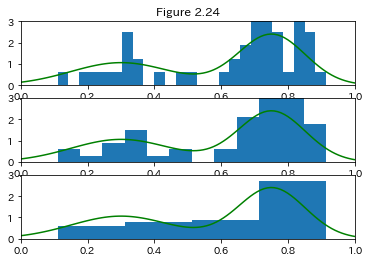

In [15]:
def mix_G(x):
    return (0.4 * G1 + 0.6 * G2)

def mix_G_distribution(n):
  
    ratio = 0.3
    
    if random.random() <ratio:
        return random.gauss(M1, S1)
    else:
        return random.gauss(M2, S2)

def main():
    x = np.linspace(0, 1, 100)

    # 平均値と分散を設定
    M1 = 0.3
    S1 = 0.15
    # 正規分布の確率密度分布から値を取得
    G1 = stats.norm.pdf(x, M1, S1)

    # Set normal distribution1 
    M2 = 0.75
    S2 = 0.1
    G2 = stats.norm.pdf(x, M2, S2)

    N = 50
    Data = [mix_G_distribution(n) for n in range(N)]


    plt.subplot(3, 1, 1)
    plt.hist(Data, bins=25, normed=True)
    plt.plot(x, mix_G(x), "g-")
    plt.xlim(0, 1)
    plt.ylim(0, 3)
    title("Figure 2.24")

    plt.subplot(3, 1, 2)
    plt.hist(Data, bins=round(1/0.08), normed=True)
    plt.plot(x, mix_G(x), "g-")
    plt.xlim(0, 1)
    plt.ylim(0, 3)

    plt.subplot(3, 1, 3)
    plt.hist(Data, bins=round(1/0.25), normed=True)
    plt.plot(x, mix_G(x), "g-")
    plt.xlim(0, 1)
    plt.ylim(0, 3)

main()

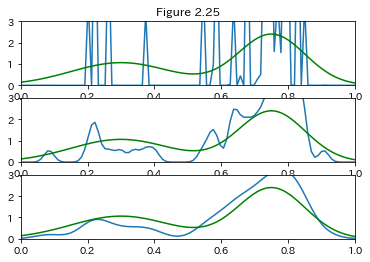

In [16]:
def mix_G(x):
    return (0.4 * G1 + 0.6 * G2)

def main():
    x = np.linspace(0, 1, 100)

    # 平均値と分散を設定
    M1 = 0.3
    S1 = 0.15
    # 正規分布の確率密度分布から値を取得
    G1 = stats.norm.pdf(x, M1, S1)

    # Set normal distribution1 
    M2 = 0.75
    S2 = 0.1
    G2 = stats.norm.pdf(x, M2, S2)
    
    plt.subplot(3, 1, 1)
    plt.plot(x, gaussian_kde(Data, 0.005)(x))
    plt.plot(x, mix_G(x), "g-")
    plt.xlim(0, 1)
    plt.ylim(0, 3)
    title("Figure 2.25")

    plt.subplot(3, 1, 2)
    plt.plot(x, gaussian_kde(Data, 0.07)(x))
    plt.plot(x, mix_G(x), "g-")
    plt.xlim(0, 1)
    plt.ylim(0, 3)

    plt.subplot(3, 1, 3)
    plt.plot(x, gaussian_kde(Data, 0.2)(x))
    plt.plot(x, mix_G(x), "g-")
    plt.xlim(0, 1)
    plt.ylim(0, 3)
    
main()

## K近傍法

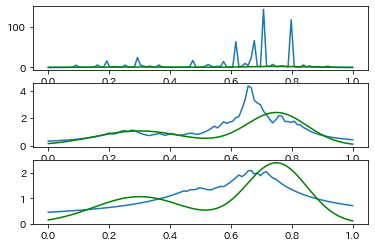

In [17]:
def k_NN(test, train, k):
    train = np. array(train)
    train.sort()
    r = []
    
    # テストデータの各点ごとに最も近い訓練データのクラスを求める
    for idx in test:
        distance = abs(train - idx)
        distance.sort()
        r.append(distance[(k-1)])
    r = np.array(r)
    
    return k / (2* r* N)

def main():
    x = np.linspace(0, 1, 100)
    
    m1 = 0.3
    s1 = 0.15
    G1 = stats.norm.pdf(x, m1, s1)
    
    m2 = 0.75
    s2 = 0.1
    G2 = stats.norm.pdf(x, m2, s2)
    
    N = 50
    
    Data = [mix_G_distribution(n) for n in range(N)]
    
    plt.subplot(3, 1, 1)
    plt.plot(x, k_NN(x ,Data, 1))
    plt.plot(x, mix_G(x), 'g-')
    
    plt.subplot(3, 1, 2)
    plt.plot(x, k_NN(x ,Data, 10))
    plt.plot(x, mix_G(x), 'g-')
    
    plt.subplot(3, 1, 3)
    plt.plot(x, k_NN(x ,Data, 30))
    plt.plot(x, mix_G(x), 'g-')
    
    plt.show()
    
main()